# Lead Scoring Case Study

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

## Reading and Understanding the Data

In [3]:
# Read the data from csv file

leads_main_df=pd.read_csv("Leads.csv")
leads_main_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# checking the shape of dataframe

leads_main_df.shape

(9240, 37)

In [5]:
# get the info about columns

leads_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# describing the columns of dataframe

leads_main_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# checking for duplicates in dataframe

print('Prospect ID : ',sum(leads_main_df.duplicated(subset = 'Prospect ID')))
print('Lead Number : ',sum(leads_main_df.duplicated(subset = 'Lead Number')))

Prospect ID :  0
Lead Number :  0


There are no duplicates in Prospect ID and Lead Number column.

## EDA - Data Cleaning & Treatment

In [8]:
# dropping Lead Number and Prospect ID
# since they have all unique values and are just indicative of the ID for the contacted people

leads_main_df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [9]:
# checking the top head of dataframe

leads_main_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
# Few columns seems to contains values as Select
# Replacing 'Select' values to NaN for columns such as Lead Profile, City , etc

leads_main_df = leads_main_df.replace('Select', np.nan)

In [11]:
# checking for null values in dataframe

leads_main_df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [12]:
# checking for percentage of null values in dataframe

round(100*(leads_main_df.isnull().sum()/len(leads_main_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [13]:
# Lets drop the columns with more than 40% missing values

cols_list = leads_main_df.columns

for col in cols_list:
    if((100*(leads_main_df[col].isnull().sum()/len(leads_main_df.index))) >= 40):
        leads_main_df.drop(col, 1, inplace = True)

In [14]:
# Again re-checking for null values percentage in dataframe

round(100*(leads_main_df.isnull().sum()/len(leads_main_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

## Categorical Variable Analysis

In [15]:
# checking the value counts of Country column

leads_main_df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Germany                    4
Nigeria                    4
South Africa               4
Kuwait                     4
Canada                     4
Sweden                     3
Uganda                     2
Italy                      2
Ghana                      2
Netherlands                2
China                      2
Bangladesh                 2
Belgium                    2
Philippines                2
Asia/Pacific Region        2
Russia                     1
Tanzania                   1
Denmark                    1
Kenya                      1
Switzerland                1
Malaysia      

In [16]:
# Checking the mode value for column Country

leads_main_df.Country.mode()

0    India
dtype: object

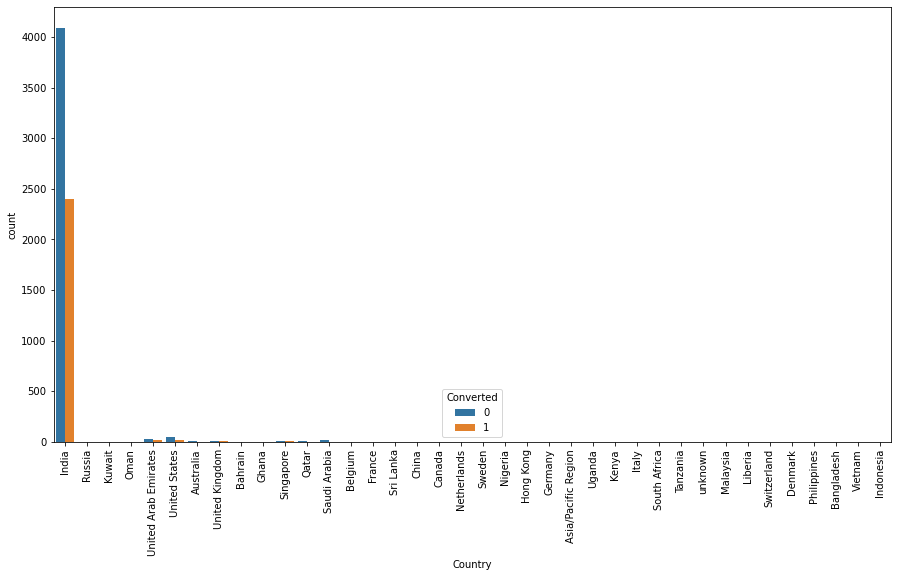

In [17]:
# Visualizing the Country column
 
plt.figure(figsize=(15,8))
s1=sns.countplot(leads_main_df.Country, hue=leads_main_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [18]:
# India is the most common occurence among the non-missing values we can impute all missing values with India

leads_main_df['Country'] = leads_main_df['Country'].replace(np.nan,'India')

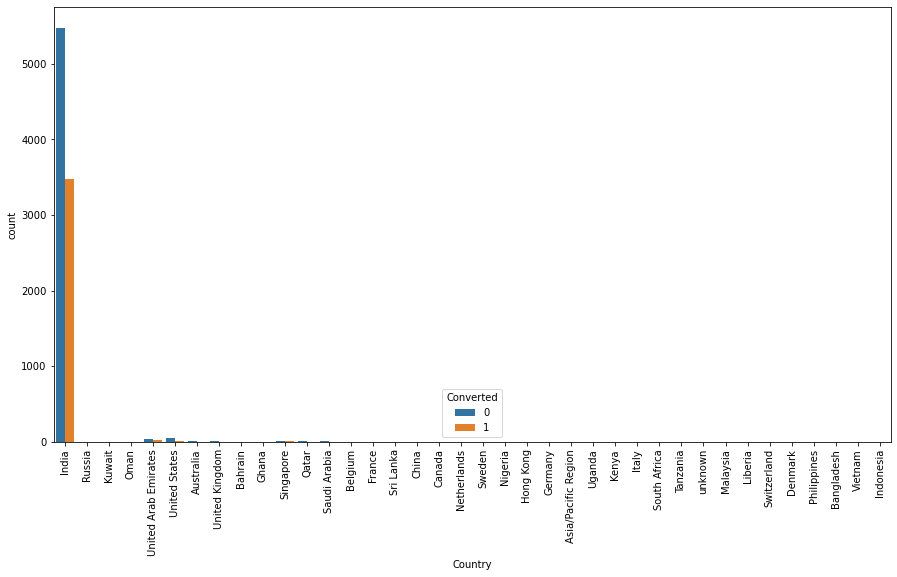

In [19]:
# Visualizing Country column after replacing NaN values

plt.figure(figsize=(15,8))
s1=sns.countplot(leads_main_df.Country, hue=leads_main_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

We can observe that the number of values for India are quite high (nearly 97% of the Data), hence this column can be dropped.

In [20]:
# list of columns to be droppped

cols_list_to_drop=['Country']

In [21]:
# checking the value counts of City column

leads_main_df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [22]:
# checking the mode of City column

leads_main_df.City.mode()[0]

'Mumbai'

In [23]:
# Replacing the NaN values with Mode value

leads_main_df['City'] = leads_main_df['City'].replace(np.nan,'Mumbai')

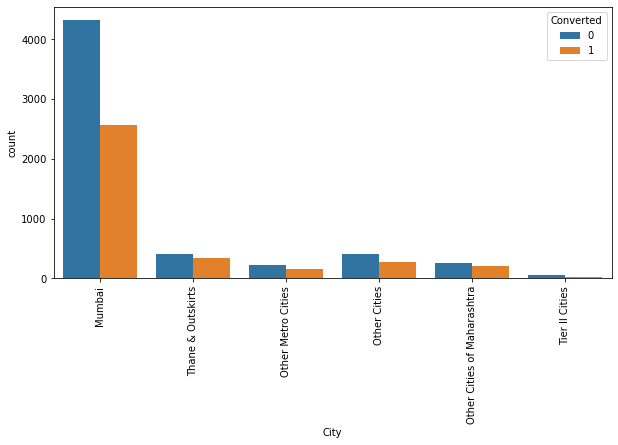

In [24]:
# Visualizing City column after replacing NaN values

plt.figure(figsize=(10,5))
s1=sns.countplot(leads_main_df.City, hue=leads_main_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [25]:
# checking the value counts of Specialization column

leads_main_df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Leads may not have mentioned specialization. So we will replace NaN values here with 'Not Specified'.

In [26]:
# Replacing the NaN value of Specialization column

leads_main_df['Specialization'] = leads_main_df['Specialization'].replace(np.nan, 'Not Specified')

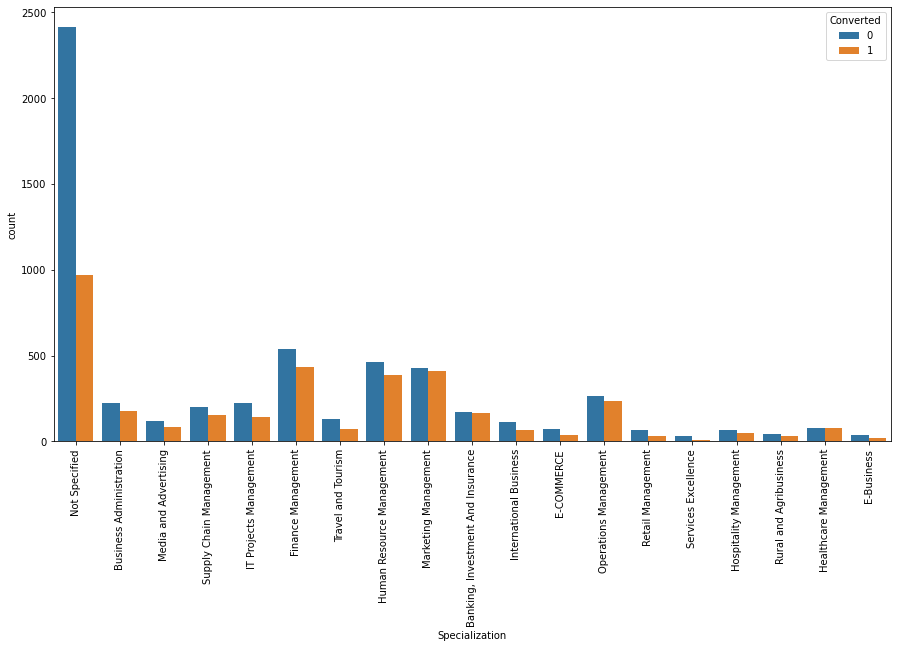

In [27]:
# Visualizing the Specialization columnn 

plt.figure(figsize=(15,8))
s1=sns.countplot(leads_main_df.Specialization, hue=leads_main_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [28]:
# Specialization with Management in them have higher number of leads as well as leads converted.
# We can combine Management Specializations because they show similar trends

leads_main_df['Specialization'] = leads_main_df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management')  

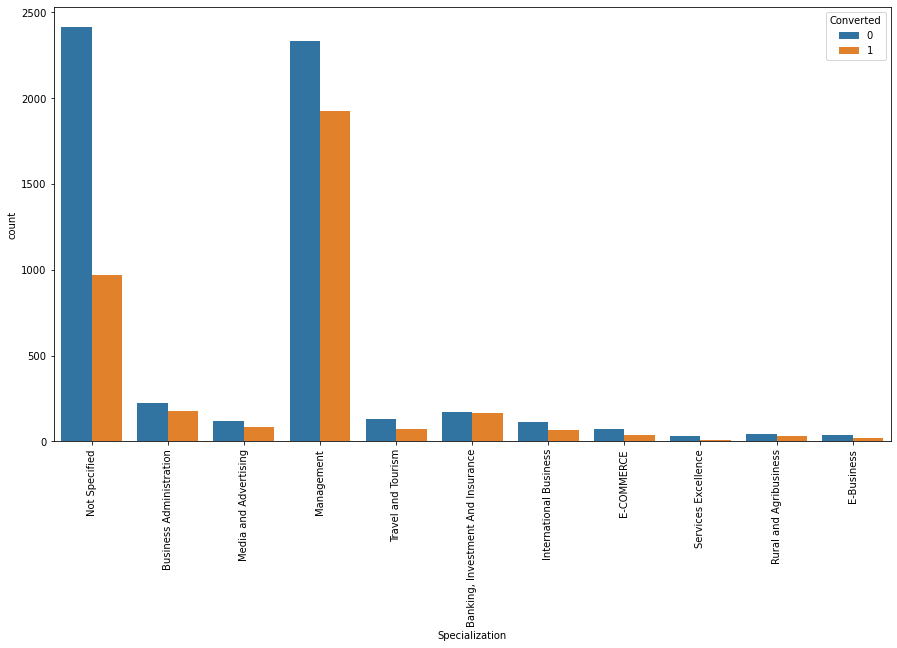

In [29]:
# visualizing the Specialization column

plt.figure(figsize=(15,8))
s1=sns.countplot(leads_main_df.Specialization, hue=leads_main_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [30]:
# checking the value counts of 'What is your current occupation' column

leads_main_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [31]:
leads_main_df['What is your current occupation'].mode()[0]

'Unemployed'

In [32]:
# Replacing NaN values with mode value

leads_main_df['What is your current occupation'] = leads_main_df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [33]:
# checking the value counts

leads_main_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

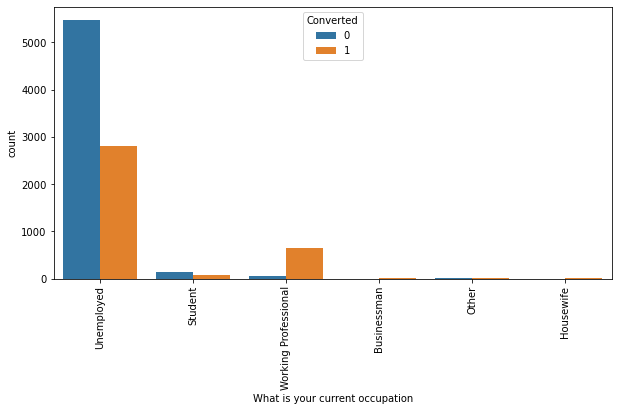

In [34]:
# visualizing the column 'What is your current occupation'

plt.figure(figsize=(10,5))
s1=sns.countplot(leads_main_df['What is your current occupation'], hue=leads_main_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Higher chance of conversion observed in Working Professional going for the course.

In [35]:
# checking the value counts for column 'What matters most to you in choosing a course'

leads_main_df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [36]:
# replacing NaN values with Mode value

leads_main_df['What matters most to you in choosing a course'] = leads_main_df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

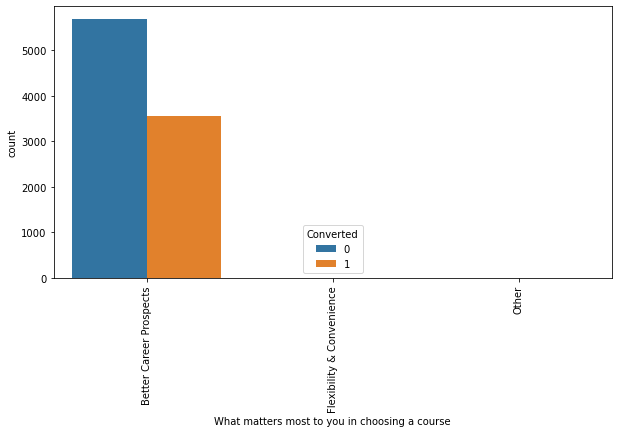

In [37]:
# visualizing the column 'What matters most to you in choosing a course'

plt.figure(figsize=(10,5))
s1=sns.countplot(leads_main_df['What matters most to you in choosing a course'], hue=leads_main_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [38]:
# checking the value counts of column 'What matters most to you in choosing a course'

leads_main_df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

We observe here that 'What matters most to you in choosing a course' is another Column that is worth Dropping. So we Append to the cols_to_drop_list.

In [39]:
# Appending the column to drop list

cols_list_to_drop.append('What matters most to you in choosing a course')
cols_list_to_drop

['Country', 'What matters most to you in choosing a course']

In [40]:
# checking the value counts column 'Tags'

leads_main_df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [41]:
# replacing NaN values with "Not Specified" as they might have forgot to specify

leads_main_df['Tags'] = leads_main_df['Tags'].replace(np.nan,'Not Specified')

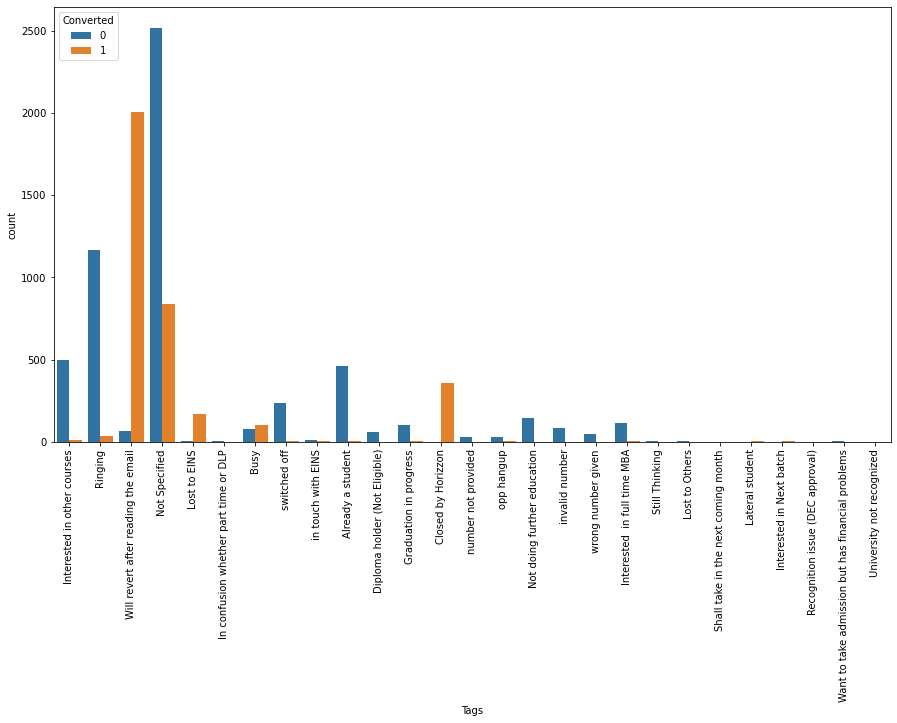

In [42]:
# visualizing the column Tags

plt.figure(figsize=(15,8))
s1=sns.countplot(leads_main_df['Tags'], hue=leads_main_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [43]:
# Replacing and merging the lower frequency values of tags column to 'Other_Tags'

leads_main_df['Tags'] = leads_main_df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

leads_main_df['Tags'] = leads_main_df['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [44]:
# checking the percentage of missing values in dataframe

round(100*(leads_main_df.isnull().sum()/len(leads_main_df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [45]:
# checking the value counts of Lead Source column

leads_main_df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
welearnblog_Home        1
NC_EDM                  1
youtubechannel          1
blog                    1
testone                 1
Pay per Click Ads       1
WeLearn                 1
Name: Lead Source, dtype: int64

In [46]:
# We can group the lower frequency values
# replacing NaN Values and combining low frequency values to 'Others'

leads_main_df['Lead Source'] = leads_main_df['Lead Source'].replace(np.nan,'Others')
leads_main_df['Lead Source'] = leads_main_df['Lead Source'].replace('google','Google')
leads_main_df['Lead Source'] = leads_main_df['Lead Source'].replace('Facebook','Social Media')
leads_main_df['Lead Source'] = leads_main_df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')                                                   

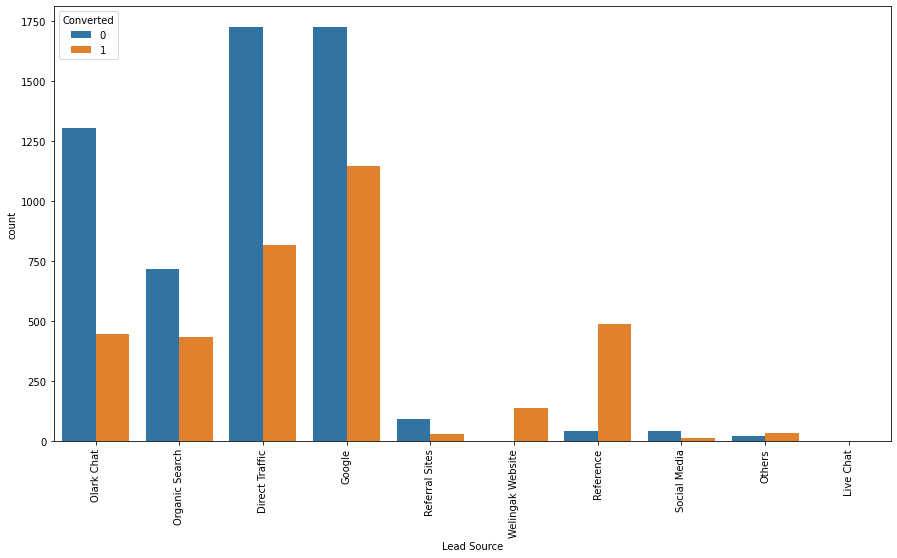

In [47]:
# visualizing the column Lead Source

plt.figure(figsize=(15,8))
s1=sns.countplot(leads_main_df['Lead Source'], hue=leads_main_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- Google and Direct traffic generates Maximum number of leads
- Reference and welingak website lead source have high conversion rate.

In [48]:
# checking the value counts of Last Activity column

leads_main_df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [49]:
# We can combine the low frequency values.
# Replacing NaN Values and combining low frequency values to 'Others'

leads_main_df['Last Activity'] = leads_main_df['Last Activity'].replace(np.nan,'Others')
leads_main_df['Last Activity'] = leads_main_df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [50]:
# checking the value counts of Last Activity column

leads_main_df['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [51]:
# Re-checking the null values in the dataframe

round(100*(leads_main_df.isnull().sum()/len(leads_main_df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [52]:
# TotalVisits and Page Views Per Visit column has less than 2% missing values,
# hence dropping them should not affect the model

leads_main_df = leads_main_df.dropna()

In [53]:
# Re-checking the null values in the dataframe

round(100*(leads_main_df.isnull().sum()/len(leads_main_df.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [54]:
# checking the value counts of Lead Origin column

leads_main_df['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

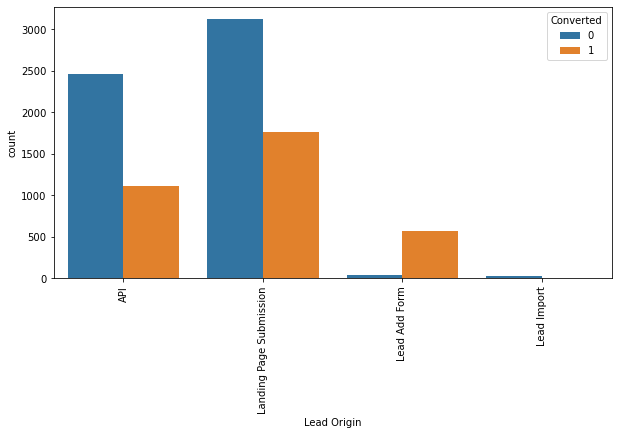

In [55]:
# visualizing the column Lead Origin

plt.figure(figsize=(10,5))
s1=sns.countplot(leads_main_df['Lead Origin'], hue=leads_main_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- Lead Add Form has a very high conversion rate but count of leads are not very high.
- Lead Import and Quick Add Form get very few leads.
- API and Landing Page Submission contribute to the higher number of leads as well as conversion.

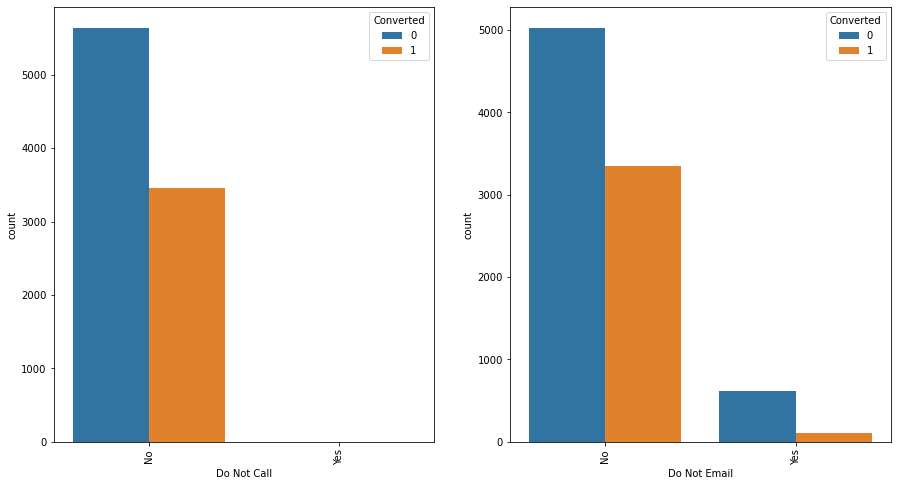

In [56]:
# visualizing the column Do Not Email & Do Not Call

plt.figure(figsize=(15,8))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(leads_main_df['Do Not Call'], hue=leads_main_df.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(leads_main_df['Do Not Email'], hue=leads_main_df.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [57]:
# checking the value counts of Do Not Call column

leads_main_df['Do Not Call'].value_counts(dropna=False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [58]:
# checking the value counts of Do Not Email column

leads_main_df['Do Not Email'].value_counts(dropna=False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

In [59]:
# We Can append the 'Do Not Call' Column to the list of Columns to be dropped since > 95% is 'No'

cols_list_to_drop.append('Do Not Call')
cols_list_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

#### Checking Imbalanced variables

In [60]:
def checkImabalnceData(col):
    print(leads_main_df[col].value_counts(dropna=False))

In [61]:
cols_imbalance = ['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
                  'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                  'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

for c in cols_imbalance:
    checkImabalnceData(c)

No     9089
Yes      14
Name: Search, dtype: int64
No    9103
Name: Magazine, dtype: int64
No     9101
Yes       2
Name: Newspaper Article, dtype: int64
No     9102
Yes       1
Name: X Education Forums, dtype: int64
No     9102
Yes       1
Name: Newspaper, dtype: int64
No     9099
Yes       4
Name: Digital Advertisement, dtype: int64
No     9096
Yes       7
Name: Through Recommendations, dtype: int64
No    9103
Name: Receive More Updates About Our Courses, dtype: int64
No    9103
Name: Update me on Supply Chain Content, dtype: int64
No    9103
Name: Get updates on DM Content, dtype: int64
No    9103
Name: I agree to pay the amount through cheque, dtype: int64
No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


In [62]:
# adding imbalanced columns to the list of columns to be dropped

cols_list_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [63]:
# checking the value counts of last Notable Activity column

leads_main_df['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Email Received                     1
View in browser link Clicked       1
Resubscribed to emails             1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

In [64]:
# We can combine the lower frequency values.
# Replacing and combining the lower frequency values to 'Other_Notable_activity'

leads_main_df['Last Notable Activity'] = leads_main_df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

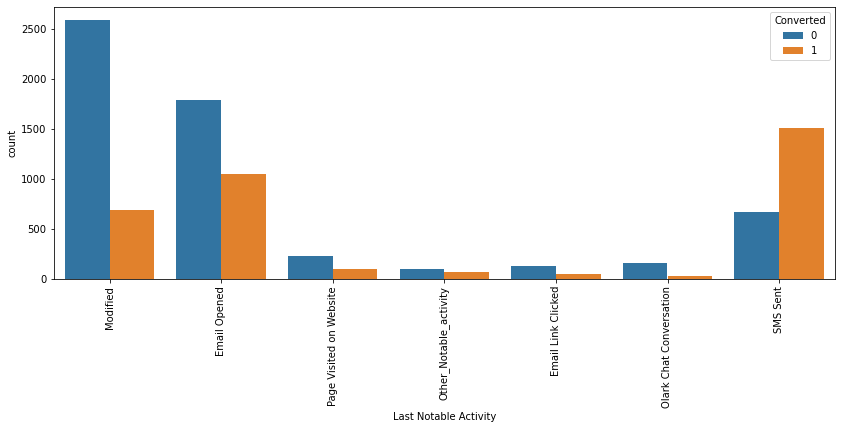

In [65]:
# visualizing the Last Notable Activity column

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads_main_df)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [66]:
# checking the value counts of Last Notable Activity column

leads_main_df['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

In [67]:
# Chekcing the values in list of columns to be dropped

cols_list_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [68]:
# Lets drop the columns

leads_main_df = leads_main_df.drop(cols_list_to_drop,1)

In [69]:
# checking the info of the dataframe

leads_main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

## Numerical Variables Analysis

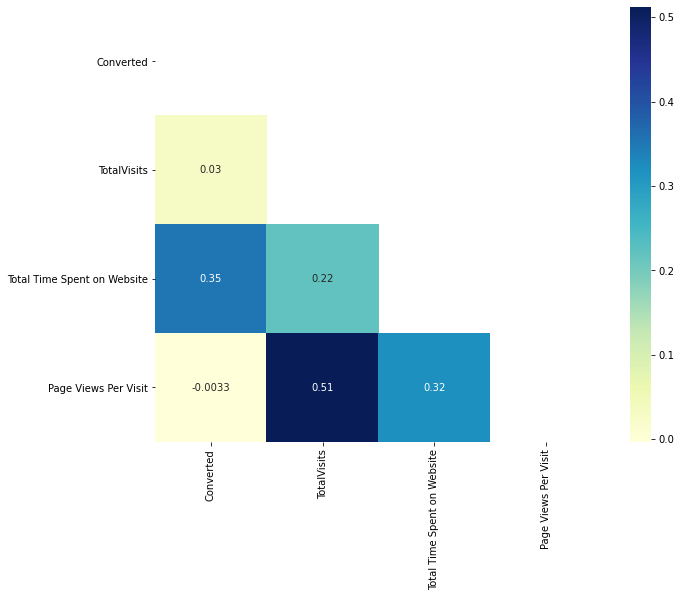

In [70]:
#Checking correlations of numeric values

plt.figure(figsize=(10,8))
matrix = np.triu(leads_main_df.corr())
sns.heatmap(leads_main_df.corr(), cmap="YlGnBu", annot=True, mask=matrix)
plt.show()

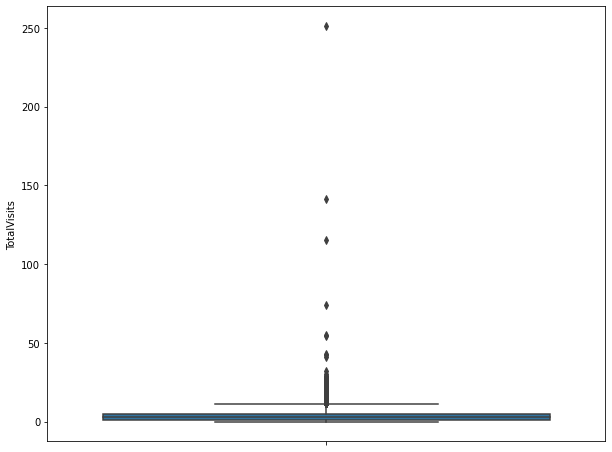

In [71]:
# visualizing the Total Visits column

plt.figure(figsize=(10,8))
sns.boxplot(y=leads_main_df['TotalVisits'])
plt.show()

In [72]:
# checking percentile values for 'Total Visits' column

leads_main_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

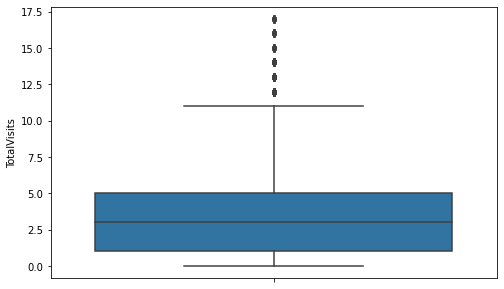

In [73]:
# Outlier treatment for Total Visits columns

Q3 = leads_main_df.TotalVisits.quantile(0.99)
leads_main_df = leads_main_df[(leads_main_df.TotalVisits <= Q3)]
Q1 = leads_main_df.TotalVisits.quantile(0.01)
leads_main_df = leads_main_df[(leads_main_df.TotalVisits >= Q1)]

plt.figure(figsize=(8,5))
sns.boxplot(y=leads_main_df['TotalVisits'])
plt.show()

In [74]:
leads_main_df.shape

(9020, 14)

In [75]:
# checking percentiles values of 'Total Time Spent on Website'

leads_main_df['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

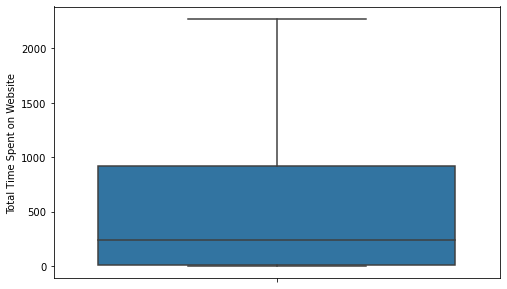

In [76]:
# visualizing 'Total Time Spent on Website' column

plt.figure(figsize=(8,5))
sns.boxplot(y=leads_main_df['Total Time Spent on Website'])
plt.show()

In [77]:
# checking percentiles values of 'Page Views Per Visit'

leads_main_df['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

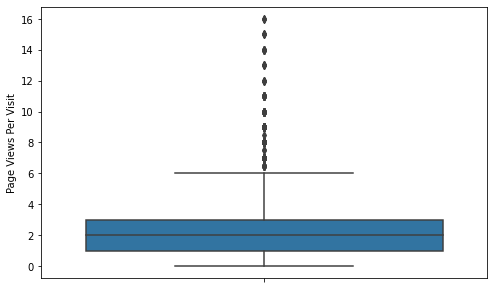

In [78]:
# visualizing the column 'Page Views Per Visit'

plt.figure(figsize=(8,5))
sns.boxplot(y=leads_main_df['Page Views Per Visit'])
plt.show()

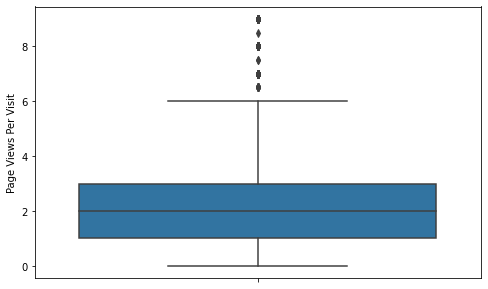

In [79]:
# Outlier Treatment for the Page Views Per Visit column

Q3 = leads_main_df['Page Views Per Visit'].quantile(0.99)
leads_main_df = leads_main_df[leads_main_df['Page Views Per Visit'] <= Q3]
Q1 = leads_main_df['Page Views Per Visit'].quantile(0.01)
leads_main_df = leads_main_df[leads_main_df['Page Views Per Visit'] >= Q1]

plt.figure(figsize=(8,5))
sns.boxplot(y=leads_main_df['Page Views Per Visit'])
plt.show()

In [80]:
leads_main_df.shape

(8953, 14)

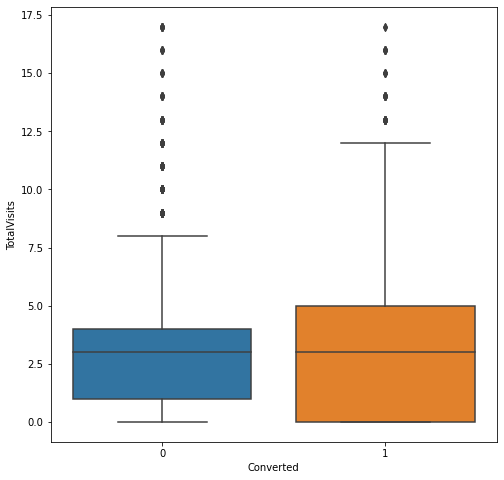

In [81]:
# Visualizing the "Total Visits" vs Converted variable

plt.figure(figsize=(8,8))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_main_df)
plt.show()

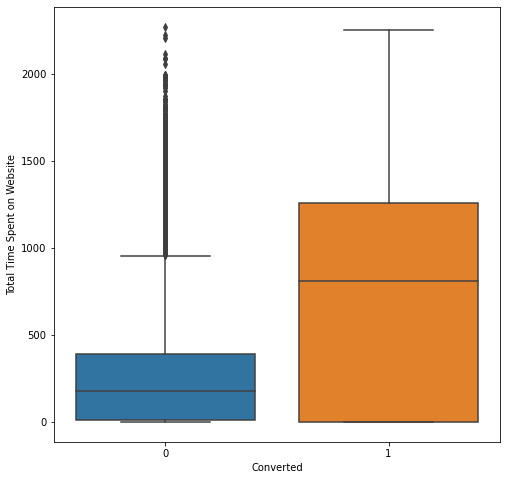

In [82]:
# Visualizing the "Total Time Spent on Website" vs Converted variable

plt.figure(figsize=(8,8))
sns.boxplot(x=leads_main_df.Converted, y=leads_main_df['Total Time Spent on Website'])
plt.show()

Leads spending more time on the website are more likely to be converted.

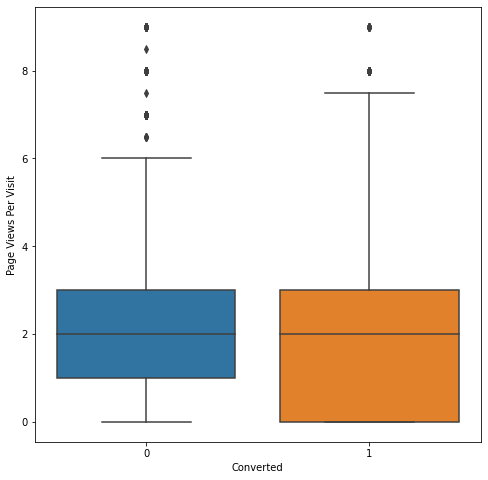

In [83]:
# Visualizing the "Page Views Per Visit" vs Converted variable

plt.figure(figsize=(8,8))
sns.boxplot(x=leads_main_df.Converted,y=leads_main_df['Page Views Per Visit'])
plt.show()

In [84]:
# Re-checking the null values in the dataframe

round(100*(leads_main_df.isnull().sum()/len(leads_main_df.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

No missing values in the dataframe now.

In [85]:
leads_main_df.shape

(8953, 14)

## Dummy Variable Creation

In [86]:
# checking the top head of dataframe

leads_main_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [87]:
# Capturing the list of categorical columns

cat_cols_list= leads_main_df.select_dtypes(include=['object']).columns
cat_cols_list

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [88]:
# Perform mapping on 'A free copy of Mastering The Interview' and 'Do Not Email' column as they contain Yes/No values

col_map_list =  ['A free copy of Mastering The Interview','Do Not Email']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

leads_main_df[col_map_list] = leads_main_df[col_map_list].apply(binary_map)

In [89]:
leads_main_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [90]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummies_df = pd.get_dummies(leads_main_df[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)
leads_main_df = pd.concat([leads_main_df,dummies_df],1)

dummies_df = pd.get_dummies(leads_main_df['Specialization'], prefix  = 'Specialization')
dummies_df = dummies_df.drop(['Specialization_Not Specified'], 1)
leads_main_df = pd.concat([leads_main_df, dummies_df], axis = 1)

dummies_df = pd.get_dummies(leads_main_df['Lead Source'], prefix  = 'Lead Source')
dummies_df = dummies_df.drop(['Lead Source_Others'], 1)
leads_main_df = pd.concat([leads_main_df, dummies_df], axis = 1)

dummies_df = pd.get_dummies(leads_main_df['Last Activity'], prefix  = 'Last Activity')
dummies_df = dummies_df.drop(['Last Activity_Others'], 1)
leads_main_df = pd.concat([leads_main_df, dummies_df], axis = 1)

dummies_df = pd.get_dummies(leads_main_df['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummies_df = dummies_df.drop(['Last Notable Activity_Other_Notable_activity'], 1)
leads_main_df = pd.concat([leads_main_df, dummies_df], axis = 1)

dummies_df = pd.get_dummies(leads_main_df['Tags'], prefix  = 'Tags')
dummies_df = dummies_df.drop(['Tags_Not Specified'], 1)
leads_main_df = pd.concat([leads_main_df, dummies_df], axis = 1)

In [91]:
# We can drop the original columns

leads_main_df.drop(cat_cols_list,1,inplace = True)

In [92]:
leads_main_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Model Building

In [93]:
# Storing the response variable to y
y = leads_main_df['Converted']
X = leads_main_df.drop('Converted', axis=1)

In [94]:
# Train and Test solitting of data

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [95]:
# checking the info of X_tarin dataframe

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 56 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 5   Lead Origin_Lead Import                               6267 non-null   uint8  
 6   What is your current occupation_Housewife             6267 non-null   uint8  
 7   What is your current occupation_Other                 6267 non-null   uint8  
 8   What is your current occupation_Student               6

In [96]:
# Data Scaling
# Numeric columns scaling

scaler = StandardScaler()
num_cols_list =X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols_list] = scaler.fit_transform(X_train[num_cols_list])

In [97]:
# Checking the top head of X_train dataframe

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,0.668862,1.848117,1.455819,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3274,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [98]:
lr = LogisticRegression()

rfe = RFE(lr, 15)
rfe = rfe.fit(X_train, y_train)

In [99]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True])

In [100]:
# List of RFE support varaibles based on their ranking

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 16),
 ('What is your current occupation_Housewife', False, 31),
 ('What is your current occupation_Other', False, 34),
 ('What is your current occupation_Student', False, 23),
 ('What is your current occupation_Unemployed', False, 20),
 ('What is your current occupation_Working Professional', False, 8),
 ('City_Other Cities', False, 22),
 ('City_Other Cities of Maharashtra', False, 37),
 ('City_Other Metro Cities', False, 40),
 ('City_Thane & Outskirts', False, 38),
 ('City_Tier II Cities', False, 28),
 ('Specialization_Banking, Investment And Insurance', False, 14),
 ('Specialization_Business Administration', False, 39),
 ('Specialization_E-Business', False, 35),
 ('Specialization_E-COMMERCE', False, 21),
 ('Specialization_International Business', F

In [101]:
# Get the list of RFE supported columns

cols = X_train.columns[rfe.support_]
cols

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [102]:
# Model building 1

X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1254.7
Date:                Mon, 08 Mar 2021   Deviance:                       2509.3
Time:                        20:29:36   Pearson chi2:                 8.34e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1899      0.088    -13.480      0.000      -1.363      -1.017
Total Time Spent on Website                       0.8970      0.053     16.999      0.000       0.794       1.000
Lead Origin_Lead Add Form                         1.6712      0.450      3.714      0.000       0.789       2.553
Lead Source_Direct Traffic                       -0.8320      0.129     -6.471      0.000      -1.084      -0.580
Lead Source_Referral Sites                       -0.5284      0.465     -1.138      0.255      -1.439       0.382
Lead Source_Welingak Website                      3.9043      1.110      3.518      0.000       1.729       6.079
Last Activity_SMS Sent                            1.2373      0.223      5.555      0.000       0.801       1.674
Last Notable Activity_Modified                   -1.2839      0.150     -8.532      0.000      -1.579      -0.989
Last Notable Activity_Olark Chat Conversation    -1.7123      0.490     -3.496      0.000      -2.672      -0.752
Last Notable Activity_SMS Sent                    1.0151      0.257      3.943      0.000       0.511       1.520
Tags_Closed by Horizzon                           6.9834      1.019      6.853      0.000       4.986       8.981
Tags_Interested in other courses                 -2.1641      0.407     -5.321      0.000      -2.961      -1.367
Tags_Lost to EINS                                 5.7302      0.608      9.419      0.000       4.538       6.923
Tags_Other_Tags                                  -2.4417      0.210    -11.633      0.000      -2.853      -2.030
Tags_Ringing                                     -3.5858      0.243    -14.752      0.000      -4.062      -3.109
Tags_Will revert after reading the email          4.4263      0.185     23.989      0.000       4.065       4.788
=================================================================================================================
"""

In [103]:
# We can drop the column 'Lead Source_Referral Sites' as it has high p=value

cols = cols.drop('Lead Source_Referral Sites',1)

In [104]:
# Model Building 2

X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1255.3
Date:                Mon, 08 Mar 2021   Deviance:                       2510.7
Time:                        20:29:36   Pearson chi2:                 8.34e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2029      0.088    -13.729      0.000      -1.375      -1.031
Total Time Spent on Website                       0.8963      0.053     16.979      0.000       0.793       1.000
Lead Origin_Lead Add Form                         1.6795      0.450      3.735      0.000       0.798       2.561
Lead Source_Direct Traffic                       -0.8224      0.128     -6.409      0.000      -1.074      -0.571
Lead Source_Welingak Website                      3.9060      1.110      3.520      0.000       1.731       6.081
Last Activity_SMS Sent                            1.2437      0.223      5.584      0.000       0.807       1.680
Last Notable Activity_Modified                   -1.2791      0.150     -8.501      0.000      -1.574      -0.984
Last Notable Activity_Olark Chat Conversation    -1.7079      0.489     -3.491      0.000      -2.667      -0.749
Last Notable Activity_SMS Sent                    1.0150      0.257      3.943      0.000       0.510       1.520
Tags_Closed by Horizzon                           6.9868      1.019      6.857      0.000       4.990       8.984
Tags_Interested in other courses                 -2.2028      0.409     -5.391      0.000      -3.004      -1.402
Tags_Lost to EINS                                 5.7337      0.608      9.426      0.000       4.541       6.926
Tags_Other_Tags                                  -2.4401      0.210    -11.625      0.000      -2.852      -2.029
Tags_Ringing                                     -3.5818      0.243    -14.740      0.000      -4.058      -3.106
Tags_Will revert after reading the email          4.4234      0.184     23.993      0.000       4.062       4.785
=================================================================================================================
"""

We got all the p-values to be very less or either equals to zero. 
We can now check for the Variance Inflation Factor(VIF) to see if there is any correlation between the variables.

In [105]:
# Checking the VIF

vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Notable Activity_SMS Sent,6.22
4,Last Activity_SMS Sent,6.12
1,Lead Origin_Lead Add Form,1.82
5,Last Notable Activity_Modified,1.69
13,Tags_Will revert after reading the email,1.61
2,Lead Source_Direct Traffic,1.38
3,Lead Source_Welingak Website,1.34
11,Tags_Other_Tags,1.26
0,Total Time Spent on Website,1.22
8,Tags_Closed by Horizzon,1.21


In [106]:
# We can drop the variables with high VIF
# We should not drop all high VIF's at once, hece first drop 'Last Notable Activity_SMS Sent'

cols = cols.drop('Last Notable Activity_SMS Sent',1)

In [107]:
# model building 3

X_train_sm = sm.add_constant(X_train[cols])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1263.3
Date:                Mon, 08 Mar 2021   Deviance:                       2526.6
Time:                        20:29:36   Pearson chi2:                 8.51e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1179      0.084    -13.382      0.000      -1.282      -0.954
Total Time Spent on Website                       0.8896      0.053     16.907      0.000       0.786       0.993
Lead Origin_Lead Add Form                         1.6630      0.455      3.657      0.000       0.772       2.554
Lead Source_Direct Traffic                       -0.8212      0.127     -6.471      0.000      -1.070      -0.572
Lead Source_Welingak Website                      3.8845      1.114      3.488      0.000       1.701       6.068
Last Activity_SMS Sent                            1.9981      0.113     17.718      0.000       1.777       2.219
Last Notable Activity_Modified                   -1.6525      0.124    -13.279      0.000      -1.896      -1.409
Last Notable Activity_Olark Chat Conversation    -1.8023      0.491     -3.669      0.000      -2.765      -0.839
Tags_Closed by Horizzon                           7.1955      1.020      7.053      0.000       5.196       9.195
Tags_Interested in other courses                 -2.1318      0.406     -5.253      0.000      -2.927      -1.336
Tags_Lost to EINS                                 5.9177      0.611      9.689      0.000       4.721       7.115
Tags_Other_Tags                                  -2.3737      0.206    -11.507      0.000      -2.778      -1.969
Tags_Ringing                                     -3.4531      0.238    -14.532      0.000      -3.919      -2.987
Tags_Will revert after reading the email          4.5070      0.188     24.002      0.000       4.139       4.875
=================================================================================================================
"""

In [108]:
# checking the VIF's again

vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.82
12,Tags_Will revert after reading the email,1.56
4,Last Activity_SMS Sent,1.46
5,Last Notable Activity_Modified,1.40
2,Lead Source_Direct Traffic,1.38
3,Lead Source_Welingak Website,1.34
10,Tags_Other_Tags,1.25
0,Total Time Spent on Website,1.22
7,Tags_Closed by Horizzon,1.21
11,Tags_Ringing,1.16


VIF's values looks good now.

In [109]:
# Predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.283149
4696    0.031440
3274    0.576636
2164    0.006433
1667    0.989105
7024    0.130813
8018    0.024219
778     0.205594
6942    0.002678
4440    0.096716
dtype: float64

In [110]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28314859, 0.0314396 , 0.57663553, 0.00643284, 0.98910464,
       0.13081306, 0.02421913, 0.20559401, 0.00267787, 0.09671623])

In [111]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.283149,9196
1,0,0.031440,4696
2,0,0.576636,3274
3,0,0.006433,2164
4,1,0.989105,1667


In [112]:
# Lest choose an arbitrary cut-off value of 0.5 

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

In [113]:
# cheking the top head

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.283149,9196,0
1,0,0.031440,4696,0
2,0,0.576636,3274,1
3,0,0.006433,2164,0
4,1,0.989105,1667,1


In [114]:
# printing the Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3693  189]
 [ 281 2104]]


In [115]:
# checking the overall accuracy

print('Accuracy : ',(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))*100)

Accuracy :  92.50039891495133


In [116]:
# True positive
TP = confusion[1,1]

# True negatives
TN = confusion[0,0]

# False positives
FP = confusion[0,1]

# False negatives
FN = confusion[1,0]

In [117]:
# Checking the sensitivity

print('Sensitivity : ',(TP / float(TP+FN))*100)

Sensitivity :  88.21802935010481


In [118]:
# Checking the specificity

print('Specificity : ',(TN / float(TN+FP))*100)

Specificity :  95.13137557959814


In [119]:
# Checking False Postive Rate

print('False Postive Rate : ',(FP/ float(TN+FP))*100)

False Postive Rate :  4.868624420401855


In [120]:
# Checking the positive predictive value

print('Positive Predictive value : ',(TP / float(TP+FP))*100)

Positive Predictive value :  91.75752289576974


In [121]:
# Checking the negative predictive value

print('Negative Predictive value : ',((TN / float(TN+ FN))*100))

Negative Predictive value :  92.92903875188728


### ROC Curve

In [122]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [123]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

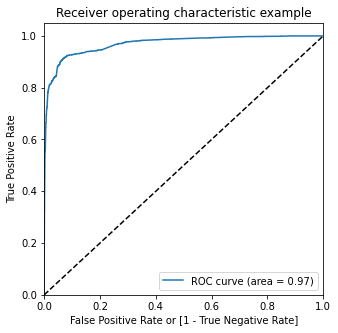

In [124]:
# plotting ROC curve graph

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

ROC curve(area = 0.97), which indicates a good predictive model.

### Optimal Cutoff point

In [125]:
# lets create columns with different probability cutoffs
# for determining the best cut-off value  

nums = [float(x)/10 for x in range(10)]
for n in nums:
    y_train_pred_final[n]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > n else 0)

In [126]:
# checking the top head of dataframe

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.283149,9196,0,1,1,1,0,0,0,0,0,0,0
1,0,0.031440,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.576636,3274,1,1,1,1,1,1,1,0,0,0,0
3,0,0.006433,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.989105,1667,1,1,1,1,1,1,1,1,1,1,1


In [127]:
# Calculating the accuracy, sensitivity and specificity for various probability cutoffs

cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

num_list = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num_list:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]

In [128]:
cutoff_df

,probability,accuracy,sensitivity,specificity
0.0,0.0,0.380565,1.000000,0.000000
0.1,0.1,0.816180,0.971488,0.720762
0.2,0.2,0.901069,0.931237,0.882535
0.3,0.3,0.922930,0.916981,0.926584
0.4,0.4,0.925802,0.901468,0.940752
0.5,0.5,0.925004,0.882180,0.951314
0.6,0.6,0.915909,0.828092,0.969861
0.7,0.7,0.916228,0.810063,0.981453
0.8,0.8,0.906335,0.774843,0.987120
0.9,0.9,0.887027,0.718239,0.990726


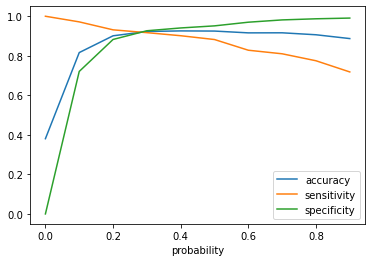

In [129]:
#  plotting the accuracy, sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [130]:
# 0.3 seems to be the optimum point from above plot

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

In [131]:
# checking the top head of dataframe

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.283149,9196,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.031440,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.576636,3274,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.006433,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.989105,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [132]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map(lambda x: round(x*100))

In [133]:
# checking the top head of dataframe

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.283149,9196,0,28
1,0,0.031440,4696,0,3
2,0,0.576636,3274,1,58
3,0,0.006433,2164,0,1
4,1,0.989105,1667,1,99


In [134]:
# Checking the overall accuracy now

print('Accuracy : ',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)*100)

Accuracy :  92.2929631402585


In [135]:
# checking the confusion matrix

confusion_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion_2

array([[3597,  285],
       [ 198, 2187]], dtype=int64)

In [136]:
# True positive
TP = confusion_2[1,1]

# True negatives
TN = confusion_2[0,0]

# False positives
FP = confusion_2[0,1]

# False negatives
FN = confusion_2[1,0]

In [137]:
# checking the sensitivity

print('Sensitivity : ',(TP / float(TP+FN)*100))

Sensitivity :  91.69811320754717


In [138]:
# Checking the specificity

print('Specificity : ',(TN / float(TN+FP)*100))

Specificity :  92.65842349304482


### Train data observations :
Accuracy : 92.29%, 
Sensitivity : 91.69%, 
Specificity : 92.65%

We can derive other stats indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall as below -

In [139]:
# calculating the False Postive Rate

print('False Postive Rate : ',(FP/ float(TN+FP))*100)

False Postive Rate :  7.341576506955177


In [140]:
# calculating the Positive predictive value 

print('Positive Predictive value : ',(TP / float(TP+FP))*100)

Positive Predictive value :  88.47087378640776


In [141]:
# calculating the Negative predictive value

print('Negative Predictive value : ',(TN / float(TN+ FN))*100)

Negative Predictive value :  94.78260869565217


In [142]:
# Checking on the confusion matrix again

confusion_3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion_3

array([[3597,  285],
       [ 198, 2187]], dtype=int64)

In [143]:
# True positive 
TP = confusion_3[1,1]

# True negatives
TN = confusion_3[0,0]

# False positives
FP = confusion_3[0,1]

# False negatives
FN = confusion_3[1,0]

In [144]:
# checking the precision

print('Precision : ',(TP/(TP+FP))*100)

Precision :  88.47087378640776


In [145]:
# checking the recall

print('Recall : ',(TP/(TP+FN))*100)

Recall :  91.69811320754717


In [146]:
# checking the precision score

print('Precision score : ',(precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted))*100)

Precision score :  88.47087378640776


In [147]:
# checking the score of recall

print('Recall score : ',(recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted))*100)

Recall score :  91.69811320754717


In [148]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

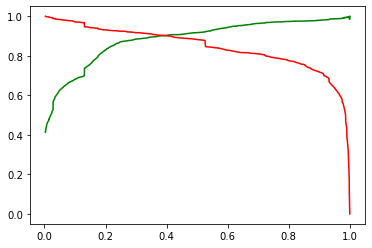

In [149]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [150]:
# scaling the test dataset

num_cols_list = X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols_list] = scaler.fit_transform(X_test[num_cols_list])

In [151]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,0.575687,-0.311318,0.092860,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
984,-0.090676,-0.550262,0.356568,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8135,-0.423857,0.812462,-0.170849,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
6915,0.242505,-0.628665,-0.170849,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2712,-0.090676,-0.421456,0.356568,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [152]:
X_test = X_test[cols]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,-0.311318,0,1,0,1,0,0,0,0,0,0,1,0
984,-0.550262,0,0,0,1,1,0,0,0,0,1,0,0
8135,0.812462,0,1,0,1,0,0,0,0,0,0,0,0
6915,-0.628665,0,0,0,0,0,0,0,0,0,0,1,0
2712,-0.421456,0,0,0,0,0,0,0,0,0,0,0,1


In [153]:
X_test_sm = sm.add_constant(X_test)

### Prediction on Test DataSet

In [154]:
y_test_pred = res.predict(X_test_sm)

In [155]:
y_test_pred[:10]

7681    0.024819
984     0.025692
8135    0.686054
6915    0.005880
2712    0.953208
244     0.002398
4698    0.014697
8287    0.027549
6791    0.981608
8970    0.005703
dtype: float64

In [156]:
# converting y_test_pred to dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [157]:
# checking the top head of dataframe

y_pred_1.head()

,0
7681,0.024819
984,0.025692
8135,0.686054
6915,0.005880
2712,0.953208


In [158]:
# converting the y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [159]:
y_test_df['Prospect ID'] = y_test_df.index

In [160]:
# remove index for both dataframes
# and append them horizontally

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [161]:
# checking the top head of dataframe

y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.024819
1,0,984,0.025692
2,0,8135,0.686054
3,0,6915,0.005880
4,1,2712,0.953208


In [162]:
# renaming the column

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [163]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.024819
1,0,984,0.025692
2,0,8135,0.686054
3,0,6915,0.005880
4,1,2712,0.953208


In [164]:
# rearranging the columns of dataframe

y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map(lambda x: round(x*100))

In [165]:
# checking the top head of dataframe

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.024819,2
1,984,0,0.025692,3
2,8135,0,0.686054,69
3,6915,0,0.005880,1
4,2712,1,0.953208,95


In [166]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [167]:
# checking the top head of dataframe

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.024819,2,0
1,984,0,0.025692,3,0
2,8135,0,0.686054,69,1
3,6915,0,0.005880,1,0
4,2712,1,0.953208,95,1


In [168]:
# checking the overall accuracy

print('Accuracy : ',(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted))*100)

Accuracy :  92.77736411020105


In [169]:
# checking the confusion matrix

confusion_4 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion_4

array([[1563,  113],
       [  81,  929]], dtype=int64)

In [170]:
# True positive 
TP = confusion_4[1,1]

# True negatives
TN = confusion_4[0,0]

# False positives
FP = confusion_4[0,1]

# False negatives
FN = confusion_4[1,0]

In [171]:
# checking the sensitivity

print('Sensitivity : ',(TP / float(TP+FN))*100)

Sensitivity :  91.98019801980199


In [172]:
# checking the specificity

print('Specificity : ',(TN / float(TN+FP))*100)

Specificity :  93.25775656324582


In [173]:
# checking the precision score

print('Precision score : ',(precision_score(y_pred_final.Converted , y_pred_final.final_Predicted))*100)

Precision score :  89.15547024952015


In [174]:
# checking the recall score

print('Recall score : ', (recall_score(y_pred_final.Converted, y_pred_final.final_Predicted))*100)

Recall score :  91.98019801980199


### Test data observations :
Accuracy : 92.77%, 
Sensitivity : 91.98%, 
Specificity : 93.25%

<h1><center> Comparision between Train and Test data observations </center></h1>

| Train/Test | Accuracy | Sensitivity | Specificity |
| :-: | :-: | :-: | :-: |
| <b>TRAIN</b> | 92.29% | 91.69% | 92.65% |
| <b>TEST</b> | 92.77% | 91.98% | 93.25% |